Ссылка на репозиторий GitHub: https://github.com/FrustrationDesu/sprint10

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-машинного-обучения" data-toc-modified-id="Подготовка-данных-для-машинного-обучения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных для машинного обучения</a></span></li><li><span><a href="#Формирование-выборок" data-toc-modified-id="Формирование-выборок-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Формирование выборок</a></span></li><li><span><a href="#Применение-модели-машинного-обучения" data-toc-modified-id="Применение-модели-машинного-обучения-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Применение модели машинного обучения</a></span></li><li><span><a href="#Исследование-баланса-классов-выборки" data-toc-modified-id="Исследование-баланса-классов-выборки-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исследование баланса классов выборки</a></span><ul class="toc-item"><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Обучение-моделей-на-сбалансированной-выборке" data-toc-modified-id="Обучение-моделей-на-сбалансированной-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей на сбалансированной выборке</a></span><ul class="toc-item"><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Признаки:
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата



Целевой признак:
* Exited — факт ухода клиента

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    recall_score, 
    precision_score, 
    roc_auc_score, 
    roc_curve, 
    confusion_matrix
)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
RANDOM_STATE = 12345

In [3]:
df = pd.read_csv('Churn.csv')

In [4]:
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   
5     8.0  113755.78              2          1               0   
6     7.0       0.00              2          1               1   
7     4.0  115046.74              4          1               0   
8     4.0  142051.07              2          0               1   
9     2.0  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe(include='all')

RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age       Tenure        Balance  NumOfProducts    HasCrCard  \
count   10000.000000  9091.000000   10000.000000   10000.000000  10000.00000   
unique           NaN          NaN            NaN            NaN          NaN   
top              NaN          NaN            NaN            NaN          NaN   
freq             NaN          NaN            NaN            NaN          NaN   
mean       38.921800     4.997690   76485.889288       1.530200      0.70550   
std        10.487806     2.894723   62397.405202       0.581654      0.45584   
min        18.000000     0.000000       0.000000       1.000000      0.00000   
25%        32.000000     2.000000       0.000000       1.000000      0.00000   
50%        37.000000     5.000000   97198.540000       1.000000      1.00000   
75%        44.000000     7.000000  127644.240000       2.000000      1.00000   
max        92.000000    10.000000  250898.090000       4.000000      1.00000   

        IsActiveMember  EstimatedSalary        Exited  
count     10000.000000     10000.000000  10000.000000  
unique             NaN              NaN           NaN  
top                NaN              NaN           NaN  
freq               NaN              NaN           NaN  
mean          0.515100    100090.239881      0.203700  
std           0.499797     57510.492818      0.402769  
min           0.000000        11.580000      0.000000  
25%           0.000000     51002.110000      0.000000  
50%           1.000000    100193.915000      0.000000  
75%           1.000000    149388.247500      0.000000  
max           1.000000    199992.480000      1.000000

Всю важную информацию вывели.
Самый ключевой столбец - Exited.
Он же и будет использоваться как целевой признак

In [8]:
df.duplicated().sum()

0

In [9]:
df.head(20)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0           1    15634602   Hargrave          619    France  Female   42   
1           2    15647311       Hill          608     Spain  Female   41   
2           3    15619304       Onio          502    France  Female   42   
3           4    15701354       Boni          699    France  Female   39   
4           5    15737888   Mitchell          850     Spain  Female   43   
5           6    15574012        Chu          645     Spain    Male   44   
6           7    15592531   Bartlett          822    France    Male   50   
7           8    15656148     Obinna          376   Germany  Female   29   
8           9    15792365         He          501    France    Male   44   
9          10    15592389         H?          684    France    Male   27   
10         11    15767821     Bearce          528    France    Male   31   
11         12    15737173    Andrews          497     Spain    Male   24   
12         13    15632264        Kay          476    France  Female   34   
13         14    15691483       Chin          549    France  Female   25   
14         15    15600882      Scott          635     Spain  Female   35   
15         16    15643966    Goforth          616   Germany    Male   45   
16         17    15737452      Romeo          653   Germany    Male   58   
17         18    15788218  Henderson          549     Spain  Female   24   
18         19    15661507    Muldrow          587     Spain    Male   45   
19         20    15568982        Hao          726    France  Female   24   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      2.0       0.00              1          1               1   
1      1.0   83807.86              1          0               1   
2      8.0  159660.80              3          1               0   
3      1.0       0.00              2          0               0   
4      2.0  125510.82              1          1               1   
5      8.0  113755.78              2          1               0   
6      7.0       0.00              2          1               1   
7      4.0  115046.74              4          1               0   
8      4.0  142051.07              2          0               1   
9      2.0  134603.88              1          1               1   
10     6.0  102016.72              2          0               0   
11     3.0       0.00              2          1               0   
12    10.0       0.00              2          1               0   
13     5.0       0.00              2          0               0   
14     7.0       0.00              2          1               1   
15     3.0  143129.41              2          0               1   
16     1.0  132602.88              1          1               0   
17     9.0       0.00              2          1               1   
18     6.0       0.00              1          0               0   
19     6.0       0.00              2          1               1   

    EstimatedSalary  Exited  
0         101348.88       1  
1         112542.58       0  
2         113931.57       1  
3          93826.63       0  
4          79084.10       0  
5         149756.71       1  
6          10062.80       0  
7         119346.88       1  
8          74940.50       0  
9          71725.73       0  
10         80181.12       0  
11         76390.01       0  
12         26260.98       0  
13        190857.79       0  
14         65951.65       0  
15         64327.26       0  
16          5097.67       1  
17         14406.41       0  
18        158684.81       0  
19         54724.03       0

In [10]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

В столбце Tenure есть nan значения
По идее, лучшим вариантом будет заполнить или же медианным значением, или же минимальным, т.е. нулём. 

In [11]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

In [12]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Промежуточные выводы:
* Row Number не понадобится нам для ML
* Costomerld - есть просто ид клиента, что тоже бесполезно будет для ML
* Surname - фамилия клиента, бесполезна для ML

Все остальные столбцы, думаю, будут полезны.



* Geography - стран всего 3, нужно будет делать ordinal encoding
* Gender - всего два, поэтому требуется ordinal encoding


## Исследование задачи

### Подготовка данных для машинного обучения

In [13]:
drop_df = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(drop_df, axis=1)

In [14]:
df.head(10)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42     2.0       0.00              1   
1          608     Spain  Female   41     1.0   83807.86              1   
2          502    France  Female   42     8.0  159660.80              3   
3          699    France  Female   39     1.0       0.00              2   
4          850     Spain  Female   43     2.0  125510.82              1   
5          645     Spain    Male   44     8.0  113755.78              2   
6          822    France    Male   50     7.0       0.00              2   
7          376   Germany  Female   29     4.0  115046.74              4   
8          501    France    Male   44     4.0  142051.07              2   
9          684    France    Male   27     2.0  134603.88              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
5          1               0        149756.71       1  
6          1               1         10062.80       0  
7          1               0        119346.88       1  
8          0               1         74940.50       0  
9          1               1         71725.73       0

In [15]:
df.shape

(10000, 11)

Удалили лишние столбцы, оставили лишь важные для обучения ML<br>


In [16]:
df = pd.get_dummies(df, drop_first=True)
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42     2.0       0.00              1          1   
1          608   41     1.0   83807.86              1          0   
2          502   42     8.0  159660.80              3          1   
3          699   39     1.0       0.00              2          0   
4          850   43     2.0  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

Итак. Методом get_dummies для датасета мы разобрали столбцы Geography и Gender на дополнительные.

### Формирование выборок

Формировать будем 60 - 20 - 20, где 60% будет отводиться обучению, и по 20 валид. и тест. выборке

In [17]:
features = df.drop('Exited', axis=1)
target = df['Exited']

In [18]:
features_train, features_validtest, target_train, target_validtest = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345)

In [19]:
features_valid, features_test, target_valid, target_test = train_test_split(features_validtest,
                                                    target_validtest,
                                                    train_size=0.5,
                                                    random_state=12345)

**Вывод**

Были создана выборки:

- *Обучающая*:

features_train, target_train

- *Валидационная*:

features_valid, target_valid

- *Тестовая*:

features_test, target_test

In [20]:
features_train.shape

(6000, 11)

In [21]:
features_train.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7479          567   35     8.0  153137.74              1          1   
3411          711   37     8.0  113899.92              1          0   
6027          850   44     3.0  140393.65              2          0   
1247          512   24     6.0       0.00              2          1   
3716          665   27     2.0  147435.96              1          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7479               0         88659.07                  0                1   
3411               0         80215.20                  0                0   
6027               1        186285.52                  1                0   
1247               0         37654.31                  0                0   
3716               0        187508.06                  1                0   

      Gender_Male  
7479            1  
3411            0  
6027            1  
1247            1  
3716            0

In [22]:
#Методом scaler определим численные признаки для масштабирования
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [23]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
#Масштабируем численные признаки обучающей выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
7479    -0.886751 -0.373192  1.082277  1.232271      -0.891560          1   
3411     0.608663 -0.183385  1.082277  0.600563      -0.891560          0   
6027     2.052152  0.480939 -0.737696  1.027098       0.830152          0   
1247    -1.457915 -1.417129  0.354288 -1.233163       0.830152          1   
3716     0.130961 -1.132419 -1.101690  1.140475      -0.891560          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7479               0        -0.187705                  0                1   
3411               0        -0.333945                  0                0   
6027               1         1.503095                  1                0   
1247               0        -1.071061                  0                0   
3716               0         1.524268                  1                0   

      Gender_Male  
7479            1  
3411            0  
6027            1  
1247            1  
3716            0

In [26]:
#Масштабируем численные признаки тестовой выборки 
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
7041    -2.226392 -0.088482 -1.101690 -1.233163       0.830152          1   
5709    -0.087120  0.006422  1.446272 -1.233163      -0.891560          1   
7117    -0.917905 -0.752805 -0.009707  0.722307      -0.891560          1   
7775    -0.253277  0.101325  1.810266 -1.233163       0.830152          1   
8735     0.785204 -0.847708  1.810266  0.615625      -0.891560          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7041               0         0.647083                  0                0   
5709               0        -1.658410                  0                0   
7117               1        -1.369334                  0                1   
7775               0         0.075086                  0                1   
8735               1        -1.070919                  0                0   

      Gender_Male  
7041            1  
5709            0  
7117            1  
7775            1  
8735            1

In [27]:
#Масштабируем численные признаки валидационной выборки 
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
8532    -0.699824 -0.373192 -1.101690 -1.233163       0.830152          1   
5799    -0.284431  0.575842 -0.737696 -1.233163      -0.891560          1   
5511     0.151731 -0.657902 -1.829679  0.438711      -0.891560          1   
7365    -0.876366 -0.278288  1.810266  1.239884      -0.891560          1   
7367    -0.481743  0.291132  1.810266 -1.233163       0.830152          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
8532               0        -0.015173                  0                0   
5799               1         1.471724                  0                0   
5511               0        -1.367107                  1                0   
7365               1        -0.786517                  0                1   
7367               0         1.358533                  0                1   

      Gender_Male  
8532            0  
5799            0  
5511            1  
7365            0  
7367            1

### Применение модели машинного обучения

In [28]:
#Заранее напишем функцию для изучия полноты, точности и F1-меры
def all_stats(target_valid, prediction):
    print("Полнота:" , recall_score(target_valid, prediction))
    print("Точность:", precision_score(target_valid, prediction))
    print("F1-мера:", f1_score(target_valid, prediction))

In [29]:
%%time
#Дерево
best_f1_DTC = 0
best_depth_DTC = 0
for depth in range(1, 16):
    model_DTC = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth= depth)
    model_DTC.fit(features_train, target_train)
    predicted_valid_DTC = model_DTC.predict(features_valid)
    f1_DTC = f1_score(target_valid, predicted_valid_DTC)
    if f1_DTC > best_f1_DTC:
        best_f1_DTC = f1_DTC
        best_depth_DTC = depth
        best_model_DTC = model_DTC
        predicted_valid_DTC_best = predicted_valid_DTC
print("Глубина дерева:", best_depth_DTC)
print(all_stats(target_valid, predicted_valid_DTC_best))

Глубина дерева: 6
Полнота: 0.44976076555023925
Точность: 0.7768595041322314
F1-мера: 0.5696969696969697
None
CPU times: user 182 ms, sys: 2.48 ms, total: 184 ms
Wall time: 187 ms


In [30]:
DTC_probabilities_one_valid = best_model_DTC.predict_proba(features_valid)[:, 1]
auc_roc_DTC = roc_auc_score(target_valid, DTC_probabilities_one_valid)
print('Площадь ROC-кривой:', auc_roc_DTC)

Площадь ROC-кривой: 0.8164631712023421


In [31]:
%%time
#Лес
best_f1_RFC = 0
best_depth_RFC = 0
for est in range(10, 151, 10):
    for depth in range(1, 16):
        model_RFC = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        model_RFC.fit(features_train, target_train)
        predicted_valid_RFC = model_RFC.predict(features_valid)
        f1_RFC = f1_score(target_valid, predicted_valid_RFC)
        if f1_RFC > best_f1_RFC:
            best_f1_RFC = f1_RFC
            best_depth_RFC = depth
            best_est_RFC = est
            best_model_RFC = model_RFC
            predicted_valid_RFC_best = predicted_valid_RFC
print("Глубина дерева:", best_depth_RFC, "; Количество деревьев:",
      best_est_RFC)
print(all_stats(target_valid, predicted_valid_RFC_best))

Глубина дерева: 10 ; Количество деревьев: 10
Полнота: 0.47368421052631576
Точность: 0.7951807228915663
F1-мера: 0.5937031484257871
None
CPU times: user 50.2 s, sys: 374 ms, total: 50.6 s
Wall time: 50.6 s


In [32]:
RFC_probabilities_one_valid = best_model_RFC.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, RFC_probabilities_one_valid)
print("Площадь ROC-кривой:", auc_roc_RFC)

Площадь ROC-кривой: 0.8449164947767649


In [33]:
%%time
#Логистическая регрессия
model_LR = LogisticRegression(solver = 'liblinear')
model_LR.fit(features_train, target_train)
LR_probabilities_one_valid = model_LR.predict_proba(features_valid)[:, 1]
auc_roc_LR = roc_auc_score(target_valid, LR_probabilities_one_valid)
predicted_valid_LR = model_LR.predict(features_valid)
f1_LR = f1_score(target_valid, predicted_valid_LR)
print("Площадь ROC-кривой", auc_roc_LR)
print(all_stats(target_valid, predicted_valid_LR))

Площадь ROC-кривой 0.7587512627102753
Полнота: 0.23444976076555024
Точность: 0.5632183908045977
F1-мера: 0.33108108108108103
None
CPU times: user 92.7 ms, sys: 7.43 ms, total: 100 ms
Wall time: 24.4 ms


Самый большой показатель f1_меры оказался у модели случайного леса с показателями:

Глубина дерева: 12 ; Количество деревьев: 90

При этих гиперпараметрах:

- F1-мера: 0.5696969696969697
- Полнота: 0.44976076555023925
- Точность: 0.7768595041322314
- F1-мера: 0.5696969696969697

### Исследование баланса классов выборки

In [34]:
target_train.value_counts(normalize = 1)

0    0.800667
1    0.199333
Name: Exited, dtype: float64

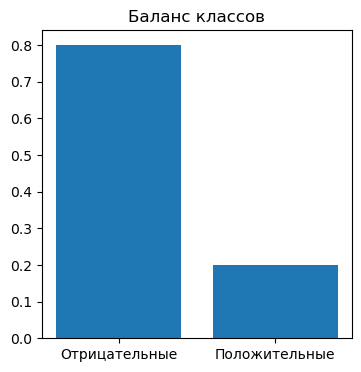

In [35]:
# Построим диаграмму баланса классов
names = ['Отрицательные', 'Положительные']
values = target_train.value_counts(normalize = 1)
plt.figure(figsize=(4,4))
plt.title('Баланс классов')
plt.bar(names, values)
plt.show()

В выборке отрицательных ответов большинство, а именно - 0.800667, что чуть более 80%.

Следовательно, положительных ответов чуть меньше 20%, а это указывает на явный *дисбаланс*

In [36]:
# Функция для отображения соотношения ответов моделей (сколько 0, сколько 1)
def all_models_share():
    
    DTC_share = pd.Series(best_model_DTC.predict(features_valid)).value_counts(normalize = 1)
    
    RFC_share = pd.Series(model_RFC.predict(features_valid)).value_counts(normalize = 1)
    
    LR_share = pd.Series(model_LR.predict(features_valid)).value_counts(normalize = 1)
        
    print("Доли ответов:")
    print("Дерево решений:\n", DTC_share)
    print("Случайный лес:\n", RFC_share)
    print("Логистическая регрессия:\n", LR_share)


In [37]:
#Применим функцию отображения соотношения ответов моделей
all_models_share()

Доли ответов:
Дерево решений:
 0    0.879
1    0.121
dtype: float64
Случайный лес:
 0    0.8775
1    0.1225
dtype: float64
Логистическая регрессия:
 0    0.913
1    0.087
dtype: float64


Одинаково плохо модели справляются с заданной задачей, из-за неравномерного баланса классов модели обучаются чаще давать негативный ответ, что приводит к плохим результатам.


Далее строим матрицу ошибок и изобразим ROC-кривую для каждой модели

#### RandomForest

In [38]:
#матрица ошибок для случайного леса
RFC_prediction = model_RFC.predict(features_valid)
confusion_matrix(target_valid, RFC_prediction)

array([[1529,   53],
       [ 226,  192]])

In [39]:
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())
colors_list

['#acc2d9',
 '#56ae57',
 '#b2996e',
 '#a8ff04',
 '#69d84f',
 '#894585',
 '#70b23f',
 '#d4ffff',
 '#65ab7c',
 '#952e8f',
 '#fcfc81',
 '#a5a391',
 '#388004',
 '#4c9085',
 '#5e9b8a',
 '#efb435',
 '#d99b82',
 '#0a5f38',
 '#0c06f7',
 '#61de2a',
 '#3778bf',
 '#2242c7',
 '#533cc6',
 '#9bb53c',
 '#05ffa6',
 '#1f6357',
 '#017374',
 '#0cb577',
 '#ff0789',
 '#afa88b',
 '#08787f',
 '#dd85d7',
 '#a6c875',
 '#a7ffb5',
 '#c2b709',
 '#e78ea5',
 '#966ebd',
 '#ccad60',
 '#ac86a8',
 '#947e94',
 '#983fb2',
 '#ff63e9',
 '#b2fba5',
 '#63b365',
 '#8ee53f',
 '#b7e1a1',
 '#ff6f52',
 '#bdf8a3',
 '#d3b683',
 '#fffcc4',
 '#430541',
 '#ffb2d0',
 '#997570',
 '#ad900d',
 '#c48efd',
 '#507b9c',
 '#7d7103',
 '#fffd78',
 '#da467d',
 '#410200',
 '#c9d179',
 '#fffa86',
 '#5684ae',
 '#6b7c85',
 '#6f6c0a',
 '#7e4071',
 '#009337',
 '#d0e429',
 '#fff917',
 '#1d5dec',
 '#054907',
 '#b5ce08',
 '#8fb67b',
 '#c8ffb0',
 '#fdde6c',
 '#ffdf22',
 '#a9be70',
 '#6832e3',
 '#fdb147',
 '#c7ac7d',
 '#fff39a',
 '#850e04',
 '#efc0fe',
 '#4

In [40]:
#напишем функцию для удобного изображения ROC-кривой 
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='#9f8303', label='ROC')
    plt.plot([0, 1], [0, 1], color='#be03fd', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend()
    plt.show()

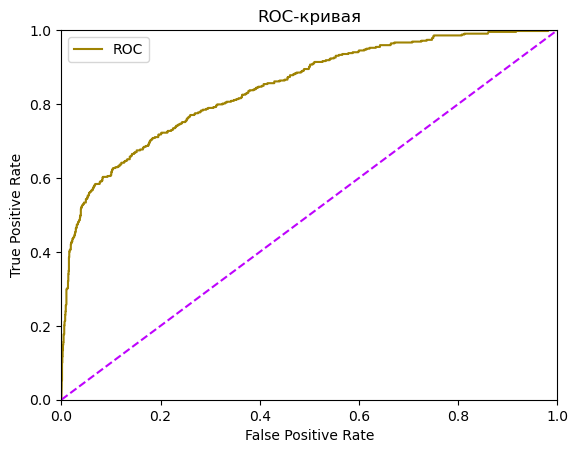

In [41]:
#ROC-кривая для случайного леса
fper, tper, thresholds = roc_curve(target_valid, RFC_probabilities_one_valid)
plot_roc_curve(fper, tper)

#### DecisionTree

In [42]:
#Матрица ошибок для дерево решений
DTC_prediction = best_model_DTC.predict(features_valid)
confusion_matrix(target_valid, DTC_prediction)

array([[1528,   54],
       [ 230,  188]])

In [43]:
auc_roc_DTC

0.8164631712023421

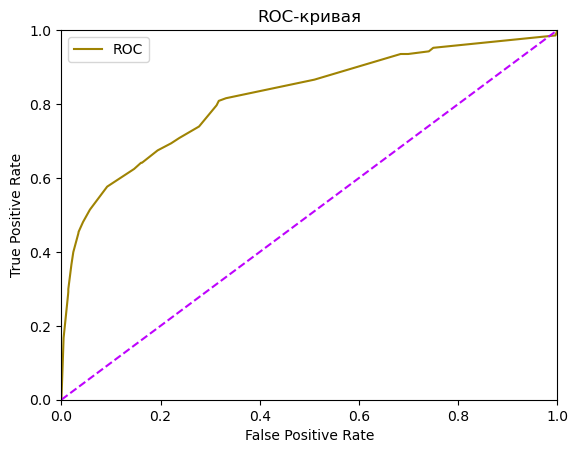

In [44]:
#ROC-кривая для дерева решений
fper, tper, thresholds = roc_curve(target_valid, DTC_probabilities_one_valid)
plot_roc_curve(fper, tper)

#### LogisticRegression

In [45]:
#Матрица ошибок для логистической регрессии
LR_prediction = model_LR.predict(features_valid)
confusion_matrix(target_valid, LR_prediction)

array([[1506,   76],
       [ 320,   98]])

In [46]:
auc_roc_LR

0.7587512627102753

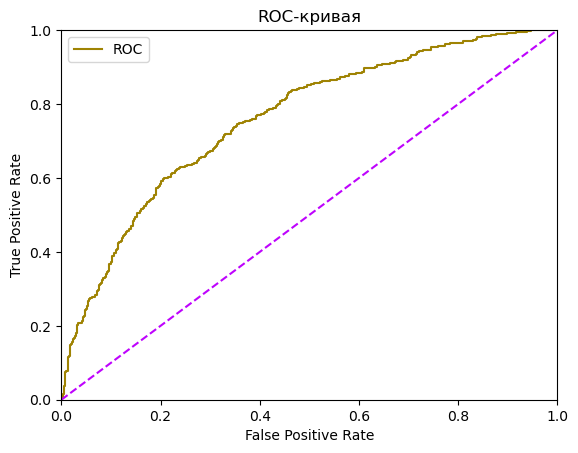

In [47]:
#ROC-кривая для логистической регрессии
fper, tper, thresholds = roc_curve(target_valid, LR_probabilities_one_valid)
plot_roc_curve(fper, tper)

**Вывод:**

Дисбаланс очевиден, модели показывают слабые результаты, 

## Борьба с дисбалансом

In [48]:
#Создадим функцию для увеличения представленной класса в выборке 
def upsample(features, target, repeat, upsampled_сlass):
    """Функция принимает значение признаков (features[]), целевого признака (target[]), repeat(int / float),
    класс который будет увеличен (upsampled_сlass (0 or 1))"""
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state= RANDOM_STATE)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state= RANDOM_STATE)
    else:
        features_upsampled = 0
        target_upsampled = 0  
      
    return features_upsampled, target_upsampled

In [49]:
#Создадим функцию для уменьшения представленной класса в выборке 
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state= RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state= RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state= RANDOM_STATE)
    
    return features_downsampled, target_downsampled

In [50]:
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, fraction=0.25)

In [51]:
# Тест функции с верным значением
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 3)
features_train_upsampled

0

In [52]:
#Применим функцию upsample 
#увеличим количество положительных ответов в 4 раза
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 1)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.501043
1    0.498957
Name: Exited, dtype: float64
(9588,)


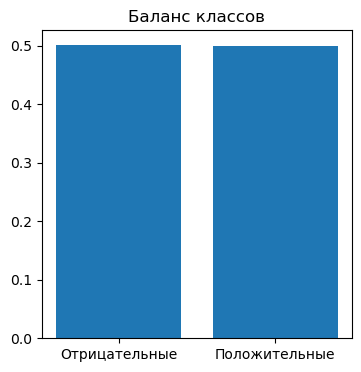

In [53]:
names = ['Отрицательные', 'Положительные']
values = target_train_upsampled.value_counts(normalize = 1)
plt.figure(figsize=(4,4))
plt.title('Баланс классов')
plt.bar(names, values)
plt.show()

In [54]:
#тест функции downsample
#Уменьшим кол-в пооложительных ответов в 4 раза
#Протестируем функцию (верное значение)
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, 0.2)
print(target_downsampled_train.value_counts(normalize = 1))
print(target_downsampled_train.shape)

1    0.554474
0    0.445526
Name: Exited, dtype: float64
(2157,)


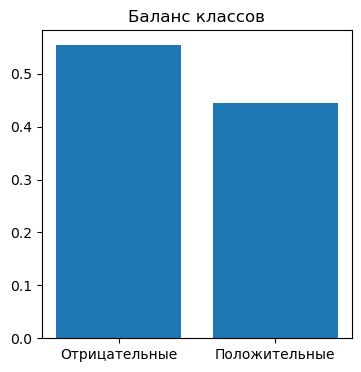

In [55]:
target_train_upsampled
names = ['Отрицательные', 'Положительные']
values = target_downsampled_train.value_counts(normalize = 1)
plt.figure(figsize=(4,4))
plt.title('Баланс классов')
plt.bar(names, values)
plt.show()

Далее будем работать с методом увеличения выборки (upsampled)

## Обучение моделей на сбалансированной выборке

### RandomForest

In [56]:
%%time
#Лес на сбалансированных данных, созданных с помощью методом upsampling
best_f1_RFC_upsampled = 0
best_depth_RFC_upsampled = 0
predicted_valid_RFC_upsampled_best = 0
for est in range(10, 151, 10):
    for depth in range(1, 16):
        for leaf in range(1,15):
            model_RFC_upsampled = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est,
                                                         max_depth=depth, min_samples_leaf = leaf)
            model_RFC_upsampled.fit(features_train_upsampled, target_train_upsampled)
            predicted_valid_RFC = model_RFC_upsampled.predict(features_valid)
            f1_RFC_upsampled = f1_score(target_valid, predicted_valid_RFC)
            if f1_RFC_upsampled > best_f1_RFC_upsampled:
                best_f1_RFC_upsampled = f1_RFC_upsampled
                best_depth_RFC_upsampled = depth
                best_leaf_RFC_upsampled = leaf
                best_est_RFC_upsampled = est
                predicted_valid_RFC_upsampled_best = predicted_valid_RFC
                best_model_RFC_upsampled = model_RFC_upsampled
print("Глубина дерева:", best_depth_RFC_upsampled, "; Количество деревьев:",
      best_est_RFC_upsampled,"; Количество листьев :", best_leaf_RFC_upsampled , "; F1-мера :", best_f1_RFC_upsampled)

Глубина дерева: 9 ; Количество деревьев: 70 ; F1-мера : 0.6291179596174282
CPU times: user 1min 13s, sys: 710 ms, total: 1min 13s
Wall time: 35min 24s


In [57]:
#auc_roc для RFC на сбалансированной выборке
RFC_upsampled_valid = best_model_RFC_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_RFC_upsampled = roc_auc_score(target_valid, RFC_upsampled_valid)
print('Площадь ROC-кривой:', auc_roc_RFC_upsampled)
all_stats(target_valid, predicted_valid_RFC_upsampled_best)

Площадь ROC-кривой: 0.8526303691650686
Полнота: 0.7081339712918661
Точность: 0.5659655831739961
F1-мера: 0.6291179596174282


### DecisionTree

In [58]:
%%time
#Дерево на сбалансированных данных, созданных с помощью методом upsampling
best_f1_DTC_upsampled = 0
best_depth_DTC_upsampled = 0
predicted_valid_DTC_upsampled_best = 0
for depth in range(1, 16):
    model_DTC_upsampled = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth= depth)
    model_DTC_upsampled.fit(features_train_upsampled, target_train_upsampled)
    predicted_valid_DTC_upsampled = model_DTC_upsampled.predict(features_valid)
    f1_DTC_upsampled = f1_score(target_valid, predicted_valid_DTC_upsampled)
    if f1_DTC_upsampled > best_f1_DTC:
        best_f1_DTC_upsampled = f1_DTC_upsampled
        best_depth_DTC_upsampled = depth
        best_model_DTC_upsampled = model_DTC_upsampled
        predicted_valid_DTC_upsampled_best = predicted_valid_DTC_upsampled
print("Глубина дерева:", best_depth_DTC_upsampled, "; F1-мера:", best_f1_DTC_upsampled)

Глубина дерева: 5 ; F1-мера: 0.5963791267305644
CPU times: user 229 ms, sys: 1.41 ms, total: 230 ms
Wall time: 229 ms


In [59]:
DTC_upsampled_valid = model_DTC_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_DTC_upsampled = roc_auc_score(target_valid, DTC_upsampled_valid)
print('Площадь ROC-кривой:', auc_roc_DTC_upsampled)
all_stats(target_valid, predicted_valid_DTC_upsampled_best)

Площадь ROC-кривой: 0.6974251295979288
Полнота: 0.6698564593301436
Точность: 0.5374280230326296
F1-мера: 0.5963791267305644


**Вывод**
Лучшей моделью по показателям оказалась модель Случайного Леса - RandomForest с гиперпараметрами:

Глубина дерева: 9 ; Количество деревьев: 70

Показатели модели случайного леса:
- Полнота: 0.7081339712918661
- Точность: 0.5659655831739961
- F1-мера: 0.6291179596174282
- Площадь ROC-кривой: 0.8526303691650686

Для всех моделей применялись данные сбалансированные методом upsampling

## Тестирование модели

In [62]:
#Обучение финальной модели
final = RandomForestClassifier( max_depth= 9,  n_estimators = 70, random_state= RANDOM_STATE)
final.fit(features_train_upsampled, target_train_upsampled)

RandomForestClassifier(max_depth=9, n_estimators=70, random_state=12345)

In [63]:
final_prediction = final.predict(features_test)
all_stats(target_test, final_prediction)

Полнота: 0.6903073286052009
Точность: 0.5427509293680297
F1-мера: 0.6077003121748179


In [64]:
#auc_roc для финальной моделина тестовой выборке
final_valid = final.predict_proba(features_test)[:, 1]
auc_roc_final = roc_auc_score(target_test, final_valid)
auc_roc_final

0.8531655550908374

In [65]:
#константная модель
target_predict_constant = pd.Series([1]*len(target_test))
target_predict_constant.value_counts()

1    2000
dtype: int64

In [66]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
dummy_model_valid = dummy_model.predict_proba(features_valid)[:, 1]

In [67]:
#Сравнение показателей значений F1-меры финальной модели и константной  
print('F1-мера конст. модели:', f1_score(dummy_model.predict(features_test), target_test))
print('F1-мера финальной модели:', f1_score(target_test, final_prediction))
#Сравнение показателей точности конст. модели и финальной
print('Точность конст. модели:', accuracy_score(dummy_model.predict(features_test), target_test))
print('Точность финальной модели:', accuracy_score(target_test, final_prediction))
#сравнение AUC-ROC
print('AUC-ROC конст. модели:', roc_auc_score(target_valid, dummy_model_valid))
print('AUC-ROC финальной модели:', roc_auc_score(target_test, final_valid))
#Сравнение показателей recall финальной модели и константной  
print('Полнота конст. модели:', recall_score(dummy_model.predict(features_test), target_test))
print('Полнота финальной модели:', recall_score(target_test, final_prediction))

F1-мера конст. модели: 0.3491539413949649
F1-мера финальной модели: 0.6077003121748179
Точность конст. модели: 0.2115
Точность финальной модели: 0.8115
AUC-ROC конст. модели: 0.5
AUC-ROC финальной модели: 0.8531655550908374
Полнота конст. модели: 0.2115
Полнота финальной модели: 0.6903073286052009


Финал модель имеет результаты выше константной, тем самым проходя проверку на адекватность

## Выводы

- Нашли пропущенные значения в некоторых столбцах и заполнили более полезными значениями.
- Нашли и удалили ненужные столбцы, которые могли бы помешать обучению.
- Методом get_dummies для датасета мы разобрали столбцы Geography и Gender на дополнительные, что улучшит рез-ты в дальнейшем.
- Сформировали выборки train-valid-test в пропорциях 60-20-20
- В исходных данных был явный дисбаланс( больше 80% ответов целевого признака были отрицательными, а остальная часть позитивными). Этот момент сильно мешал обучению модели, в связи с этим у модели были низкие показатели результатов.
- Дисбаланс устраняли методами upsampling и downsampling (уравнивали кол-во негативных и позитивных ответов до баланса приблизительно 50-50)
- За основу оставили метод upsampling

Самый большой показатель f1_меры оказался у модели случайного леса с гиперпараметрами:

Глубина дерева: 12 ; Количество деревьев: 90


- F1-мера: 0.5696969696969697
- Полнота: 0.44976076555023925
- Точность: 0.7768595041322314
- F1-мера: 0.5696969696969697

На основе сбалансированных данных методом upsampling, у модели RandomForest показатели стали лучше:

Модель Случайного Леса - RandomForest с гиперпараметрами:

Глубина дерева: 9 ; Количество деревьев: 70

Показатели модели случайного леса:
- Полнота: 0.7081339712918661
- Точность: 0.5659655831739961
- F1-мера: 0.6291179596174282
- Площадь ROC-кривой: 0.8526303691650686

Финальная модель прошла проверку на адекватность , сравнивали с константной моделью:

- F1-мера конст. модели: 0.3491539413949649
- F1-мера финальной модели: 0.6077003121748179
- Точность конст. модели: 0.2115
- Точность финальной модели: 0.8115
- AUC-ROC конст. модели: 0.5
- AUC-ROC финальной модели: 0.8531655550908374
- Полнота конст. модели: 0.2115
- Полнота финальной модели: 0.6903073286052009

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*